In [1]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

from colorama import Fore, Style
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from IPython.display import display, clear_output

class KNN:
    def __init__(self, k=3):
        self.k = k
    # modeli eğitmemizi sağlayan fonksiyon
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    # modelimizin tahminlerde bulunmasını sağlayan fonksiyon
    def _predict(self, x):
        # Verilen giriş vektörü ile eğitim veri setindeki her bir örnek arasındaki Öklid uzaklıklarını hesapla
        distances = [oklid_uzakligi(x, x_train) for x_train in self.X_train]
        # Hesaplanan uzaklıkları küçükten büyüğe sırala ve en küçük k uzaklığı içeren indisleri al
        k_indices = np.argsort(distances)[:self.k]
        # En yakın k komşunun etiketlerini al
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # En sık geçen etiketi bul
        most_common = Counter(k_nearest_labels).most_common()
        # En sık geçen etiketi döndür("setosa": 0, "versicolor": 1, "virginica": 2) 
        return most_common[0][0]
    
# oklid uzakligini bulmamizi saglayan fonksiyon
def oklid_uzakligi(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

# Veri yükleme ve bölme
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN modeli oluşturuyoruz ve eğitim verileri ile eğitim gerçekleştiriyoruz(k=5 seçildi.)
knn_classifier = KNN(k=5)
knn_classifier.fit(X_train, y_train)

# Eğittiğimiz modele test verileri ile tahminler yaptıyoruz
predictions = knn_classifier.predict(X_test)

print(f"Modelimizin tahminlerine ait labellar:{ np.array(predictions)}")

# y_test ve predictions'ı karşılaştır
for true_label, predicted_label in zip(y_test, predictions):
    if true_label == predicted_label:
        print(f"{Fore.GREEN}Gerçek Etiket: {true_label}, Tahmin Edilen Etiket: {predicted_label}{Style.RESET_ALL}")
    else:
        print(f"{Fore.RED}Gerçek Etiket: {true_label}, Tahmin Edilen Etiket: {predicted_label}{Style.RESET_ALL}")

Modelimizin tahminlerine ait labellar:[1 2 1 0 2 1 2 0 2 1 1 2 1 2 1 0 2 0 0 1 0 2 1 1 2 2 1 2 0 1]
Gerçek Etiket: 1, Tahmin Edilen Etiket: 1
Gerçek Etiket: 2, Tahmin Edilen Etiket: 2
Gerçek Etiket: 2, Tahmin Edilen Etiket: 1
Gerçek Etiket: 0, Tahmin Edilen Etiket: 0
Gerçek Etiket: 2, Tahmin Edilen Etiket: 2
Gerçek Etiket: 1, Tahmin Edilen Etiket: 1
Gerçek Etiket: 2, Tahmin Edilen Etiket: 2
Gerçek Etiket: 0, Tahmin Edilen Etiket: 0
Gerçek Etiket: 2, Tahmin Edilen Etiket: 2
Gerçek Etiket: 1, Tahmin Edilen Etiket: 1
Gerçek Etiket: 1, Tahmin Edilen Etiket: 1
Gerçek Etiket: 2, Tahmin Edilen Etiket: 2
Gerçek Etiket: 1, Tahmin Edilen Etiket: 1
Gerçek Etiket: 2, Tahmin Edilen Etiket: 2
Gerçek Etiket: 1, Tahmin Edilen Etiket: 1
Gerçek Etiket: 0, Tahmin Edilen Etiket: 0
Gerçek Etiket: 2, Tahmin Edilen Etiket: 2
Gerçek Etiket: 0, Tahmin Edilen Etiket: 0
Gerçek Etiket: 0, Tahmin Edilen Etiket: 0
Gerçek Etiket: 1, Tahmin Edilen Etiket: 1
Gerçek Etiket: 0, Tahmin Edilen Etiket: 0
Gerçek Etiket: 2, 

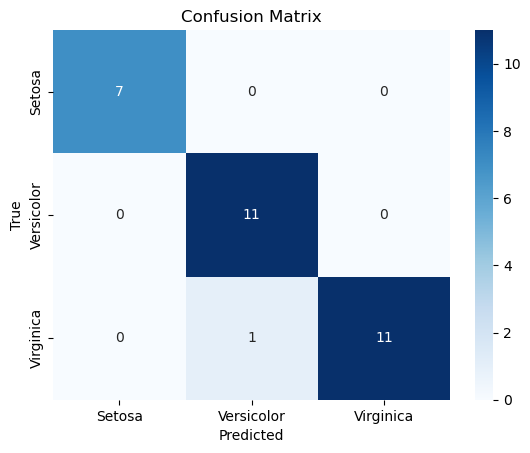

accuracy: 0.9666666666666667


In [2]:
# Modelimizin doğruluğunu değerlendiryoruz
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrisimizi görselleştirmemizi sağlayan fonksiyon tanımlandı.
def visualize_confusion_matrix(cm, class_labels):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

class_labels = ['Setosa', 'Versicolor', 'Virginica']

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
# Confusion matrix'i görselleştir
visualize_confusion_matrix(cm, class_labels)

acc = np.sum(predictions == y_test) / len(y_test)
print(f"accuracy: {acc}")

In [3]:
def label_to_numeric(label):
    return {"setosa": 0, "versicolor": 1, "virginica": 2}.get(label, -1)
def tahmin_iris(knn_classifier):
    try:
        # Kullanıcıdan 4 özelliği alıyoruz
        sepal_length = widgets.FloatText(description="Sepal(Çanak Yaprak) Uzunluğu:", layout=widgets.Layout(width='300px'))
        sepal_width = widgets.FloatText(description="Sepal(Çanak Yaprak) Genişliği:", layout=widgets.Layout(width='300px'))
        petal_length = widgets.FloatText(description="Petal(Taç Yaprak) Uzunluğu:", layout=widgets.Layout(width='300px'))
        petal_width = widgets.FloatText(description="Petal(Taç Yaprak)   Genişliği:", layout=widgets.Layout(width='300px'))

        # Kullanıcıdan çiceğin türü seçmesini istiyoruz
        tur_dropdown = widgets.Dropdown(
            options=["setosa", "versicolor", "virginica"],
            value="setosa",
            description="Çiçek Türü:",
            layout=widgets.Layout(width='300px')
        )

        # İşlemi başlatan düğme oluşturuldu
        submit_button = widgets.Button(description="Tahmin", layout=widgets.Layout(width='300px'))

       
        # Çıkış düğmesi oluşturuldu
        exit_button = widgets.Button(description="Çıkış", layout=widgets.Layout(width='300px'))

        # Kullanıcı arayüzünü düzenle
        ui = widgets.VBox([sepal_length, sepal_width, petal_length, petal_width, tur_dropdown, submit_button, exit_button])
        
        # Kullanıcının girişlerini depolamak için bir liste oluştur.
        _iris = [sepal_length, sepal_width, petal_length, petal_width]

        # Kullanıcı arayüzünü düzenlemek için bazı style ayarları yapılıyor.
        for widget in [sepal_length, sepal_width, petal_length, petal_width, tur_dropdown, submit_button,exit_button]:
            widget.style.description_width = 'initial'
            widget.style.font_weight = 'bold'

        # giriş butonuna tıklanınca yapılacak işlevler tanımlandı.
        def process_data(sender):
            try:
                # Iris çiçeği örneği oluştur 
                _iris_values = [float(entry.value) for entry in _iris]
                manuel_iris = np.array(_iris_values)
                tur = tur_dropdown.value
               
                if manuel_iris is not None: 
                    # Önceki sonuçları temizle
                    clear_output(wait=True)
                    
                    # Kullanıcı arayüzünü tekrardan göster
                    display(ui)

                    # KNN ile tahmin yapma
                    tahmin = knn_classifier._predict(manuel_iris.reshape(1, -1))
                     
                    # En yakın 5 komşu etiketlerini ekrana yazdırmak amacıyla
                    distances = [oklid_uzakligi(manuel_iris, x_train) for x_train in knn_classifier.X_train]
                    k_indices = np.argsort(distances)[:knn_classifier.k]
                    k_nearest_labels = [knn_classifier.y_train[i] for i in k_indices]

                    # Gerçek türü sayısal etikete dönüştürme
                    gercek_tur_sayisal = label_to_numeric(tur)
                    tahmin_str = {0: "setosa", 1: "versicolor", 2: "virginica"}[tahmin]

                    
                    # Sonuçları ekrana yazdırma
                    print(f"En Yakın 5 Komşu Etiketleri: {k_nearest_labels}")
                    print(f"Gerçek Tür: {tur}")
                    print(f"Sınıflandırıcı Tahmini: {tahmin_str}")

                    # Karşılaştırma
                    if gercek_tur_sayisal == tahmin:
                        print("Sonuçlar eşleşti!")
                    else:
                        print("Sonuçlar eşleşmedi.")         
            except ValueError:
                print("Hata: Geçersiz giriş. Lütfen sayısal değerleri doğru giriniz.")
        
        # çıkış butonuna tıklanınca yapılacak işlevler tanımlandı
        def exit_app(sender):
            clear_output(wait=True)
            print("Çıkış yapıldı.")
            ui.close()
        
        # giriş butonuna tıklanınca işlevi çağır
        submit_button.on_click(process_data)
        # çıkış butonuna tıklanınca işlevi çağır
        exit_button.on_click(exit_app)
            
        # Kullanıcı arayüzünü göster
        display(ui)

    except ValueError:
        print("Hata: Geçersiz giriş. Lütfen değerleri doğru giriniz.")


tur = tahmin_iris(knn_classifier)

Çıkış yapıldı.
